In [16]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Task 1: Data Preparation

def load_images_and_labels(root_dir):
    images, labels = [], []
    label_map = {label: idx for idx, label in enumerate(os.listdir(root_dir))}
    
    for label in os.listdir(root_dir):
        label_dir = os.path.join(root_dir, label)
        if os.path.isdir(label_dir):
            for image_file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, image_file)
                img = Image.open(img_path).convert('L').resize((28, 28))
                images.append(np.array(img) / 255.0)  # Normalize pixels to range [0,1]
                labels.append(label_map[label])
    
    return np.array(images), np.array(labels)

In [17]:
# Load training and testing data
train_images, train_labels = load_images_and_labels("Copy of devnagari digit/DevanagariHandwrittenDigitDataset/Train")
test_images, test_labels = load_images_and_labels("Copy of devnagari digit/DevanagariHandwrittenDigitDataset/Test")

# Reshape images to fit neural network input format
train_images = train_images.reshape(-1, 28 * 28)
test_images = test_images.reshape(-1, 28 * 28)

# Convert labels to one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
train_labels = encoder.fit_transform(train_labels.reshape(-1, 1))
test_labels = encoder.transform(test_labels.reshape(-1, 1))

In [18]:
# Task 2: Build the FCN Model
model = Sequential([
    keras.layers.Input(shape=(28 * 28,)),  # Define input layer separately
    Dense(64, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(256, activation='sigmoid'),
    Dense(10, activation='softmax')
])


In [19]:
# Task 3: Compile the Model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Task 4: Train the Model
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss', mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split=0.2, callbacks=[checkpoint, early_stop])


Epoch 1/20
 91/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2531 - loss: 2.0064

107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2855 - loss: 1.9498 - val_accuracy: 0.0000e+00 - val_loss: 7.5232
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7931 - loss: 0.6348 - val_accuracy: 0.0000e+00 - val_loss: 8.9330
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8681 - loss: 0.3434 - val_accuracy: 0.0000e+00 - val_loss: 9.5297
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9166 - loss: 0.2476 - val_accuracy: 0.0000e+00 - val_loss: 9.8218
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9435 - loss: 0.1830 - val_accuracy: 0.0000e+00 - val_loss: 10.3793
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9593 - loss: 0.1420 - val_accuracy: 0.0000e+00 - val_loss: 10.4555


In [21]:
# Task 5: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8097 - loss: 0.8708
Test Accuracy: 0.6177


In [23]:
# Task 6: Save and Load the Model
model.save("devnagari_digit_model.h5")
loaded_model = keras.models.load_model("devnagari_digit_model.h5")


In [24]:
# Task 7: Making Predictions
predictions = loaded_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


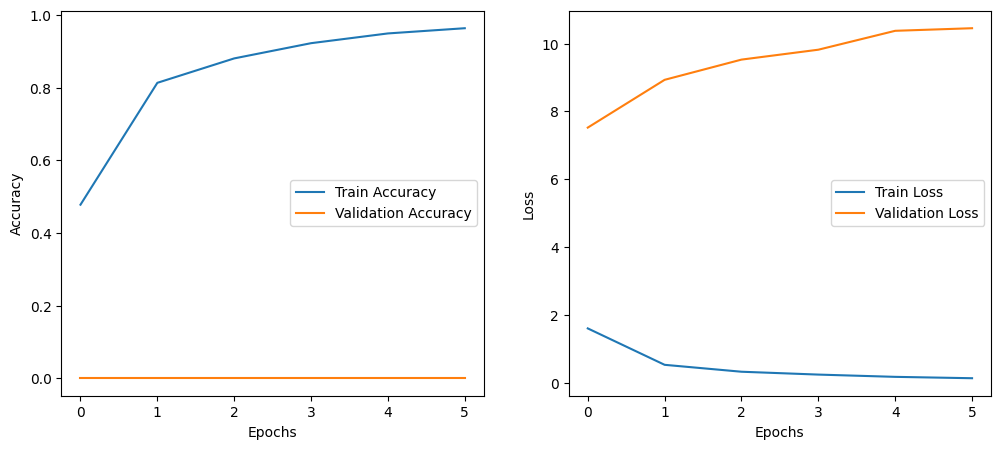

In [25]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
